In [1]:
import pencil as pc
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from scipy.optimize import curve_fit

         pencil has moved to pencil_old.
To change your scripts accordingly:
import pencilnew as pc -> import pencil as pc
import pencil as pc -> import pencil_old as pc


In [2]:
plt.rcParams['text.usetex'] = True
plt.rcParams.update({'font.size': 11})

In [3]:
param = pc.read.param()

In [4]:
grid = pc.read.grid(trim=True, quiet=True)

In [5]:
z = grid.z
x = grid.x
y = grid.y

In [6]:
sim = pc.get_sim()

In [7]:
sim.get_varlist()

['VAR0',
 'VAR1',
 'VAR2',
 'VAR3',
 'VAR4',
 'VAR5',
 'VAR6',
 'VAR7',
 'VAR8',
 'VAR9',
 'VAR10',
 'VAR11',
 'VAR12',
 'VAR13',
 'VAR14',
 'VAR15',
 'VAR16',
 'VAR17',
 'VAR18',
 'VAR19',
 'VAR20',
 'VAR21',
 'VAR22',
 'VAR23',
 'VAR24',
 'VAR25',
 'VAR26',
 'VAR27',
 'VAR28',
 'VAR29',
 'VAR30',
 'VAR31',
 'VAR32',
 'VAR33',
 'VAR34',
 'VAR35',
 'VAR36',
 'VAR37',
 'VAR38',
 'VAR39',
 'VAR40',
 'VAR41',
 'VAR42',
 'VAR43',
 'VAR44',
 'VAR45',
 'VAR46',
 'VAR47',
 'VAR48',
 'VAR49',
 'VAR50',
 'VAR51',
 'VAR52',
 'VAR53',
 'VAR54',
 'VAR55',
 'VAR56',
 'VAR57',
 'VAR58',
 'VAR59',
 'VAR60',
 'VAR61',
 'VAR62',
 'VAR63',
 'VAR64',
 'VAR65',
 'VAR66',
 'VAR67',
 'VAR68',
 'VAR69',
 'VAR70',
 'VAR71',
 'VAR72',
 'VAR73',
 'VAR74',
 'VAR75',
 'VAR76',
 'VAR77',
 'VAR78',
 'VAR79',
 'VAR80',
 'VAR81',
 'VAR82',
 'VAR83',
 'VAR84',
 'VAR85',
 'VAR86',
 'VAR87',
 'VAR88',
 'VAR89',
 'VAR90',
 'VAR91',
 'VAR92',
 'VAR93',
 'VAR94',
 'VAR95',
 'VAR96',
 'VAR97',
 'VAR98',
 'VAR99',
 'VAR100',

In [8]:
sim.get_var_time('VAR7')

350.00197

In [135]:
# vars = np.zeros()
# var = pc.read.var(var_file='VAR7', magic=['bb'], trimall=True)
var = pc.read.var(var_file='VAR170', magic=['bb'], trimall=True)

In [136]:
var.keys()

t
dx
dy
dz
x
y
z
f
l1
l2
m1
m2
n1
n2
magic
bb
uu
ux
uy
uz
lnrho
aa
ax
ay
az


In [137]:
var.t

8500.003495207

In [138]:
var.bb.shape

(3, 128, 128, 128)

In [193]:
# uz = var.uz[np.argmin(np.abs(z-0)),:,:]
uz = var.bb[2,np.argmin(np.abs(z-0)),:,:]

In [298]:
uz_ave = np.average(uz)
uz_p = (uz - uz_ave)
uz_p

array([[0.05974483, 0.05431925, 0.04819538, ..., 0.06999322, 0.06770893,
        0.06426065],
       [0.06081956, 0.05566126, 0.04997384, ..., 0.07106291, 0.06868394,
        0.06522325],
       [0.06211085, 0.05720398, 0.05193726, ..., 0.07242478, 0.06991731,
        0.06642051],
       ...,
       [0.05898245, 0.05211135, 0.04411039, ..., 0.07114794, 0.06854285,
        0.0644949 ],
       [0.05872998, 0.05249711, 0.04524508, ..., 0.06976024, 0.06741862,
        0.06373931],
       [0.05900412, 0.05323926, 0.04660893, ..., 0.06946149, 0.06720469,
        0.0637019 ]])

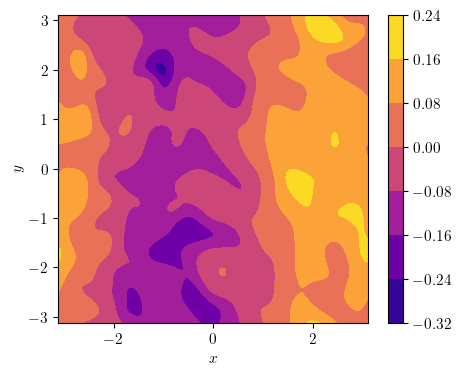

In [299]:
X, Y = np.meshgrid(x, y)
fig = plt.figure(figsize=(5,4.0))
plt.contourf(X, Y, uz_p , cmap='plasma')
plt.colorbar()
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.show()

In [366]:
uz_f = np.fft.fftshift(np.fft.fft2(uz_p, norm='forward'))
# uz_f = np.fft.fftshift(np.fft.fft2(uz_p, norm='backward'))

In [367]:
power_2d = np.abs(uz_f)**2/2

In [368]:
kx = 2*np.pi*np.fft.fftshift(np.fft.fftfreq(len(x), d=(x[1]-x[0])))
ky = 2*np.pi*np.fft.fftshift(np.fft.fftfreq(len(y), d=(y[1]-y[0])))

In [369]:
(x[-1]-x[0])/128
x_min = (x[1]-x[0])
x_min
kx_max = 2*np.pi/x_min
kx_max
x_max = x[-1]-x[0]
x_max
kx_min = 2*np.pi/x_max
kx_min


1.007873239077751

In [370]:
# size = np.shape(uz)
# lxyz = param.lxyz   #shape of the box
# #size
# nx = size[1]
# lx = lxyz[0]
# dkx = 2*np.pi/lx    #unit step along kx direction

In [371]:
# if nx%2 == 0:
#     fnx = np.arange(0, nx/2)
#     rnx = -np.flip(np.arange(1, nx/2+1))
#     kx = np.concatenate((fnx, rnx))*dkx
# else:
#     fnx = np.arange(0, nx/2)
#     rnx = -np.flip(np.arange(1, nx/2))
#     kx = np.concatenate((fnx, rnx))*dkx
# kx = np.fft.fftshift(kx)

In [372]:
# kx = 2*np.pi*np.fft.fftshift(np.fft.fftfreq(len(x), d=(x[1]-x[0])))
# ky = 2*np.pi*np.fft.fftshift(np.fft.fftfreq(len(y), d=(y[1]-y[0])))

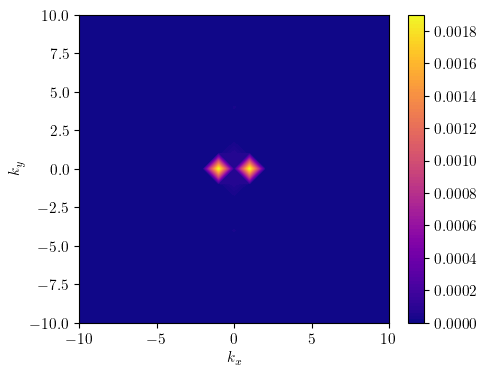

In [375]:
full = True
X, Y = np.meshgrid(kx, ky)
fig = plt.figure(figsize=(5,4.0))
plt.contourf(X, Y, power_2d, 100 , cmap='plasma')
plt.colorbar()
if full==True:
    llim = -10
else:
    llim = 0
plt.xlim(llim,10)
plt.ylim(llim,10)
plt.xlabel(r'$k_x$')
plt.ylabel(r'$k_y$')
plt.savefig('uz.png')
plt.show()

In [376]:
def power_spectra(uz, plot=False):
    uz_ave = np.average(uz)
    uz_p = (uz - uz_ave)
    uz_f = np.fft.fftshift(np.fft.fft2(uz_p, norm='ortho'))
    power_2d = 0.5*np.abs(uz_f)**2
    x = grid.x
    y = grid.y
    kx = 2*np.pi*np.fft.fftshift(np.fft.fftfreq(len(x), d=(x[1]-x[0])))
    ky = 2*np.pi*np.fft.fftshift(np.fft.fftfreq(len(y), d=(y[1]-y[0])))
    kfreq2D = np.meshgrid(kx, ky)
    knrm = np.sqrt(kfreq2D[0]**2 + kfreq2D[1]**2)
    knrm = knrm.flatten()
    fourier_amplitudes = power_2d.flatten()
    npix = power_2d.shape[0]
    kbins = np.arange(0.5, npix//2+1, 1.)
    kvals = 0.5 * (kbins[1:] + kbins[:-1])

    Abins, _, _ = stats.binned_statistic(knrm, fourier_amplitudes,
                                     statistic = "mean",
                                     bins = kbins)
    Abins *= np.pi * (kbins[1:]**2 - kbins[:-1]**2)

    if plot==True:
        plt.figure(figsize=(5,4))
        plt.loglog(kvals, Abins, label=fr'$t={np.round(var.t,2)}$')
        plt.xlabel(r"$k$")
        plt.ylabel(r"$P(k)$")
        plt.legend()
        plt.tight_layout()
        plt.savefig(f'plots/power_spectra{int(var.t)}.png', dpi = 300, bbox_inches = "tight")
    return [kvals, Abins]

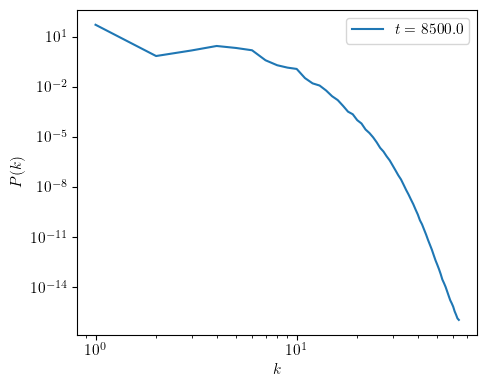

In [400]:
kv, Ab = power_spectra(uz, plot=True)

In [378]:
kfreq2D = np.meshgrid(kx, ky)

In [379]:
# kfreq2D.shape

In [380]:
knrm = np.sqrt(kfreq2D[0]**2 + kfreq2D[1]**2)

In [381]:
kfreq2D[0].shape

(128, 128)

In [382]:
knrm

array([[90.50941133, 89.80509038, 89.10642495, ..., 88.41354911,
        89.10642495, 89.80509038],
       [89.80509038, 89.09520177, 88.39092537, ..., 87.6923964 ,
        88.39092537, 89.09520177],
       [89.10642495, 88.39092537, 87.68099222, ..., 86.97676181,
        87.68099222, 88.39092537],
       ...,
       [88.41354911, 87.6923964 , 86.97676181, ..., 86.26678267,
        86.97676181, 87.6923964 ],
       [89.10642495, 88.39092537, 87.68099222, ..., 86.97676181,
        87.68099222, 88.39092537],
       [89.80509038, 89.09520177, 88.39092537, ..., 87.6923964 ,
        88.39092537, 89.09520177]])

In [383]:
knrm = knrm.flatten()
fourier_amplitudes = power_2d.flatten()

In [384]:
knrm.shape

(16384,)

In [385]:
fourier_amplitudes.shape

(16384,)

In [386]:
npix = power_2d.shape[0]

In [387]:
npix

128

In [388]:
kbins = np.arange(0.5, npix//2+1, 1.)
kbins

array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
       11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
       22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5,
       33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 40.5, 41.5, 42.5, 43.5,
       44.5, 45.5, 46.5, 47.5, 48.5, 49.5, 50.5, 51.5, 52.5, 53.5, 54.5,
       55.5, 56.5, 57.5, 58.5, 59.5, 60.5, 61.5, 62.5, 63.5, 64.5])

In [389]:
kvals = 0.5 * (kbins[1:] + kbins[:-1])
kvals

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52.,
       53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64.])

In [390]:
fourier_amplitudes.shape

(16384,)

In [391]:
knrm.shape

(16384,)

In [392]:
# import scipy.stats as stats

Abins, _, _ = stats.binned_statistic(knrm, fourier_amplitudes,
                                     statistic = "mean",
                                     bins = kbins)

In [393]:
Abins *= np.pi * (kbins[1:]**2 - kbins[:-1]**2)

In [394]:
Abins.shape

(64,)

In [395]:
def func(x, a, b):
    return a*x**b

In [396]:
kk = kvals[np.argmin(np.abs(kvals-7)):np.argmin(np.abs(kvals-20))]
ppss = Abins[np.argmin(np.abs(kvals-7)):np.argmin(np.abs(kvals-20))]

In [397]:
para, _ = curve_fit(func, kk, ppss)
ps_fit = func(kk, *para)

In [398]:
para[1]

-4.536282923062742

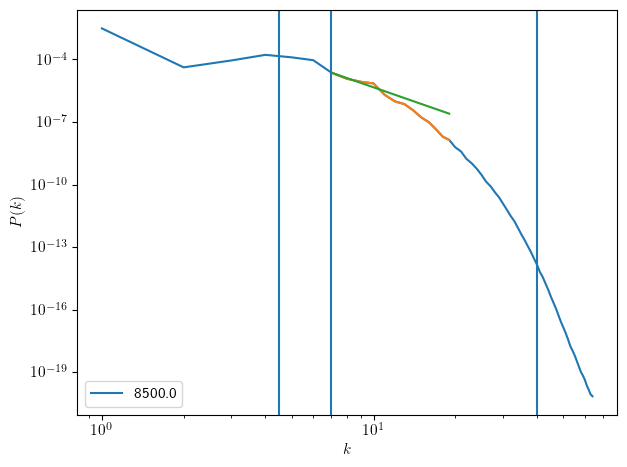

In [399]:
plt.loglog(kvals, Abins, label=np.round(var.t))
# plt.plot(kvals, Abins)
plt.plot(kk, ppss)
plt.plot(kk, ps_fit)
plt.axvline(x=7)
plt.axvline(x=4.472)
plt.axvline(x=40)
# plt.xscale('log')
# plt.yscale('log')
plt.xlabel("$k$")
plt.ylabel("$P(k)$")
plt.legend()
plt.tight_layout()
plt.savefig("power_spectrum.png", dpi = 300, bbox_inches = "tight")

In [334]:
power = pc.read.power()

power_krms.dat


power_mag.dat
powerhel_kin.dat
power_kin.dat
powerhel_mag.dat
powerbz_xy.dat
poweruz_xy.dat


In [335]:
power.keys()

t
krms
mag
hel_kin
kin
hel_mag
kx
ky
zpos
nzpos
bz_xy
uz_xy


In [336]:
power.t

array([5.0154748e+00, 1.0017271e+01, 1.5017151e+01, ..., 1.0315020e+04,
       1.0320012e+04, 1.0325016e+04], dtype=float32)

In [337]:
power.zpos

array([-0.0247])

In [338]:
power.kx

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
       52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63.])

In [339]:
var.t

8500.003495207

In [340]:
power.t[np.argmin(np.abs(power.t-var.t))]

8500.015

In [341]:
power.bz_xy.shape

(2065, 1, 64, 64)

In [342]:
power.zpos

array([-0.0247])

In [343]:
# uz_xy = power.uz_xy[np.argmin(np.abs(power.t-var.t)),0,:,:]
uz_xy = power.bz_xy[np.argmin(np.abs(power.t-var.t)),0,:,:]

In [344]:
np.max(power.bz_xy)

(0.0724-0.00742j)

(0.0, 10.0)

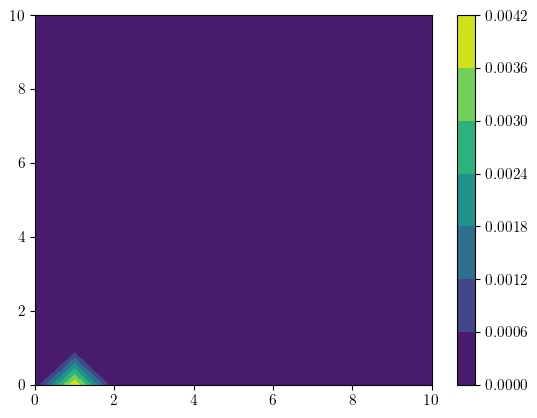

In [345]:
X, Y = np.meshgrid(power.kx, power.ky)
plt.contourf(X, Y, np.abs(uz_xy)**2)
# plt.plot(power.mag[np.argmin(np.abs(power.t-10)),:])
plt.colorbar()
plt.xlim(0,10)
plt.ylim(0,10)

In [404]:
def power_spectra1(uz, plot=False):
    uz_ave = np.average(uz)
    uz_p = uz - uz_ave
    uz_f = np.fft.fftshift(np.fft.fft2(uz_p, norm='forward'))
    power_2d = 0.5*np.abs(uz_f)**2
    x = grid.x[64:]
    y = grid.y[64:]
    kx = 2*np.pi*np.fft.fftshift(np.fft.fftfreq(len(x), d=(x[1]-x[0])))
    ky = 2*np.pi*np.fft.fftshift(np.fft.fftfreq(len(y), d=(y[1]-y[0])))
    kfreq2D = np.meshgrid(kx, ky)
    knrm = np.sqrt(kfreq2D[0]**2 + kfreq2D[1]**2)
    knrm = knrm.flatten()
    fourier_amplitudes = power_2d.flatten()
    npix = power_2d.shape[0]
    kbins = np.arange(0.5, npix//2+1, 1.)
    kvals = 0.5 * (kbins[1:] + kbins[:-1])

    Abins, _, _ = stats.binned_statistic(knrm, fourier_amplitudes,
                                     statistic = "mean",
                                     bins = kbins)
    Abins *= np.pi * (kbins[1:]**2 - kbins[:-1]**2)

    if plot==True:
        plt.loglog(kvals, Abins)
        plt.xlabel(r"$k$")
        plt.ylabel(r"$P(k)$")
        plt.tight_layout()
        # plt.savefig(f'plots/power_spectra.png', dpi = 300, bbox_inches = "tight")
    return [kvals, Abins]

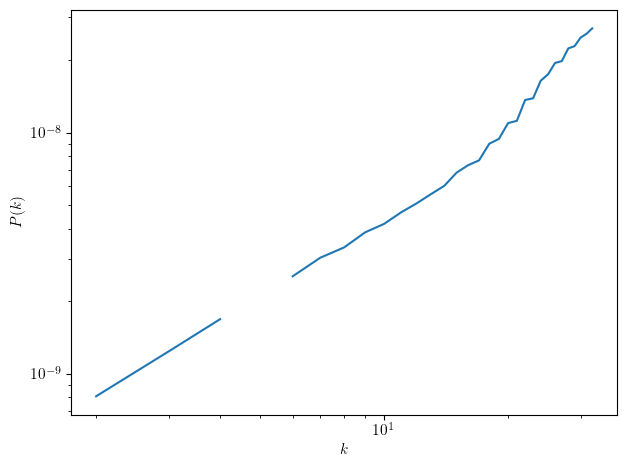

In [405]:
kv1, Ab1 = power_spectra1(uz_xy, plot=True)

In [295]:
(np.abs(uz_xy)**2).shape

(64, 64)

In [296]:
uz.shape

(128, 128)

In [ ]:
kv, Ab = power_spectra(uz, plot=True)

In [347]:
power_2d[64:,64:].shape

(64, 64)

In [348]:
X[64:].shape

(0, 64)

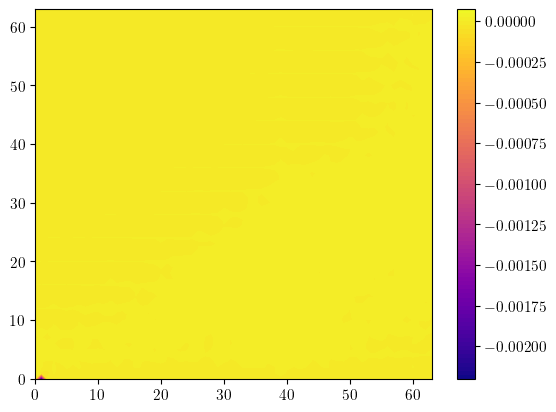

In [349]:
X, Y = np.meshgrid(kx[64:], ky[64:])
plt.contourf(X[:,:], Y[:,:], power_2d[64:,64:]-np.abs(uz_xy)**2, 100 , cmap='plasma')
plt.colorbar()

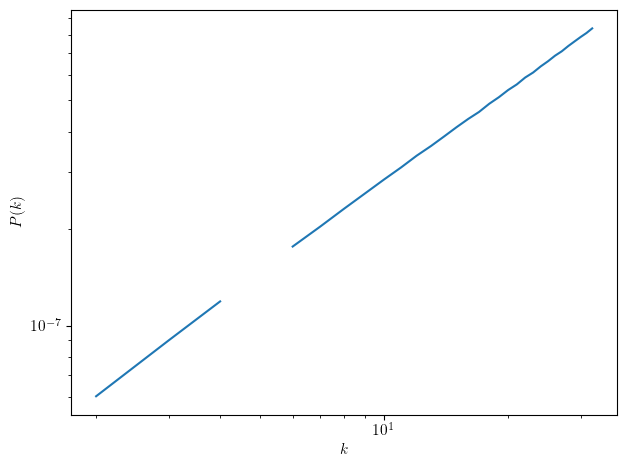

In [246]:
kv, Ab = power_spectra(np.abs(uz_xy)**2, plot=True)